In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and Preprocessing

In [2]:
#loading the csv data to a pandas DataFrame
df=pd.read_csv('gld_price_data.csv')

In [3]:
#print first 5 rows of the DataFrame
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#print last 5 rows of the DataFrame
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#checking the number of rows and columns
df.shape

(2290, 6)

In [6]:
#getting some basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getting statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
df=df.drop('Date',axis=1)

In [10]:
correlation = df.corr()

<Axes: >

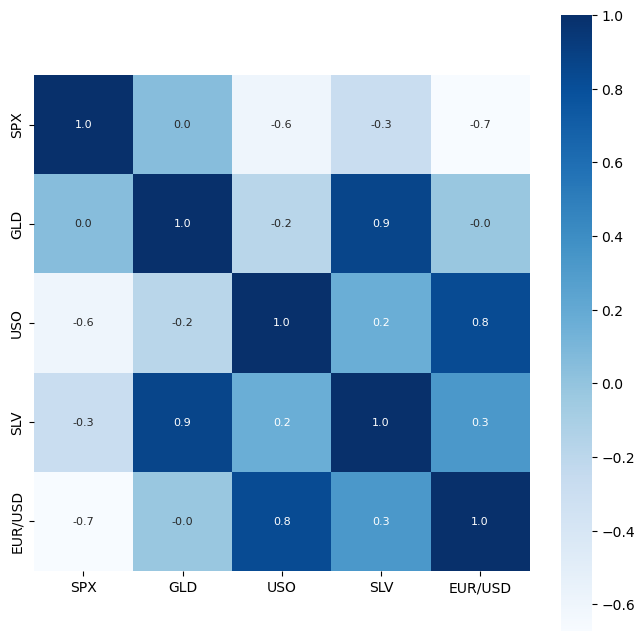

In [11]:
#constructing a heatmap to understand the correlation 
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [12]:
#correlation values of GLD 
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_508\241147981.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='orange')


<Axes: xlabel='GLD', ylabel='Density'>

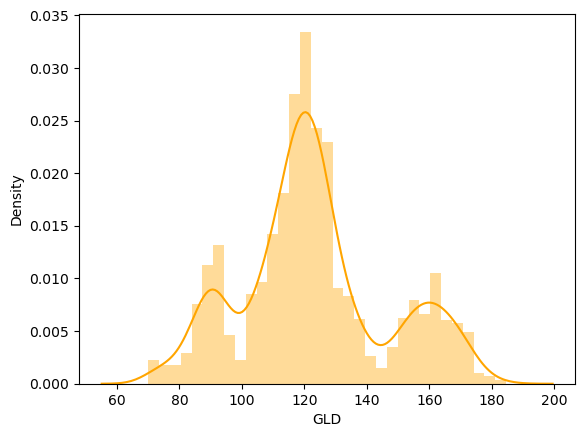

In [13]:
#check the distrubution of gold price
sns.distplot(df['GLD'], color='orange')

Splitting the Features and Target

In [14]:
x = df.drop('GLD', axis=1)
y = df['GLD']

In [15]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [16]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Splitting into Training data and Test data

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
regressor=RandomForestRegressor(n_estimators=100)

In [19]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [20]:
#prediction on Test data
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[168.72739959  82.2188998  116.0039006  127.714301   120.67710118
 154.61849745 150.46279859 126.18660042 117.52239872 126.01290087
 116.76600096 171.73660107 141.76039872 167.83499846 115.20930006
 117.34650083 138.17040274 170.05960121 159.94090252 158.87379933
 155.26590081 125.10920033 176.73600001 157.11090304 125.23440055
  93.78449975  78.1373     120.56699981 119.11979952 167.52099963
  88.24590027 125.10540021  90.99360054 117.70740023 121.09129908
 136.2688013  115.35070144 115.19630063 147.7375998  107.20680093
 104.63920213  87.17279774 126.45760092 117.7295     153.14779911
 119.67430004 108.42770048 107.90879835  93.2622005  127.24019747
  74.62710034 113.66119931 121.03860003 111.29489935 118.8062987
 120.65339939 159.68439967 168.60150057 147.0650967   85.94489889
  94.27770051  86.91299905  90.3825001  119.0041006  126.52400053
 127.4416999  168.39789987 122.1837992  117.49159892  98.49850032
 168.42900151 143.21169866 131.86090231 121.20010221 121.5131994
 119.7163006

In [21]:
#R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error:", error_score)

R squared error: 0.989589133243454


Compare the Actual values and predicted values in a plot

In [22]:
y_test = list(y_test)

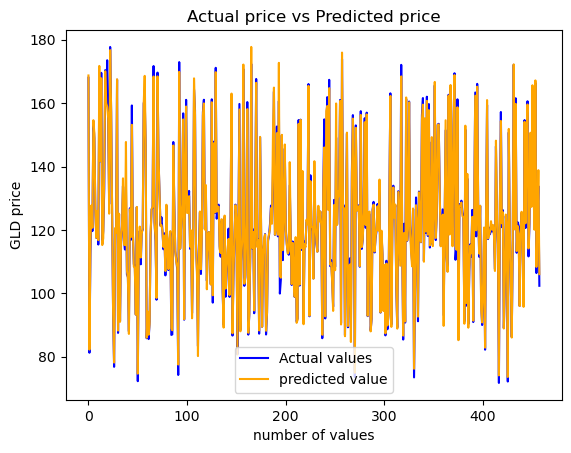

In [23]:
plt.plot(y_test,color='blue',label='Actual values')
plt.plot(test_data_prediction,color='orange',label='predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()